In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram

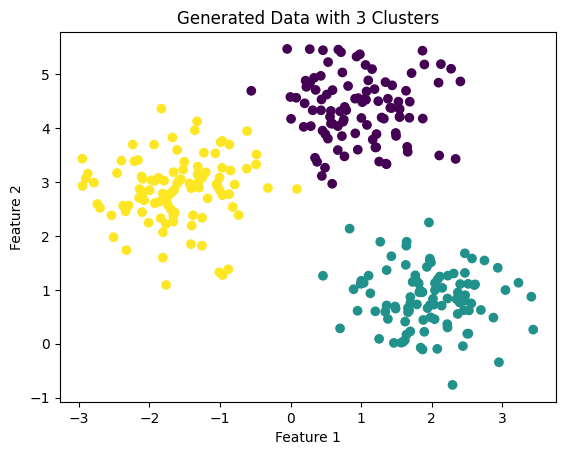

In [18]:

X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Generated Data with 3 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k, max_iters=100):
    
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):

        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids


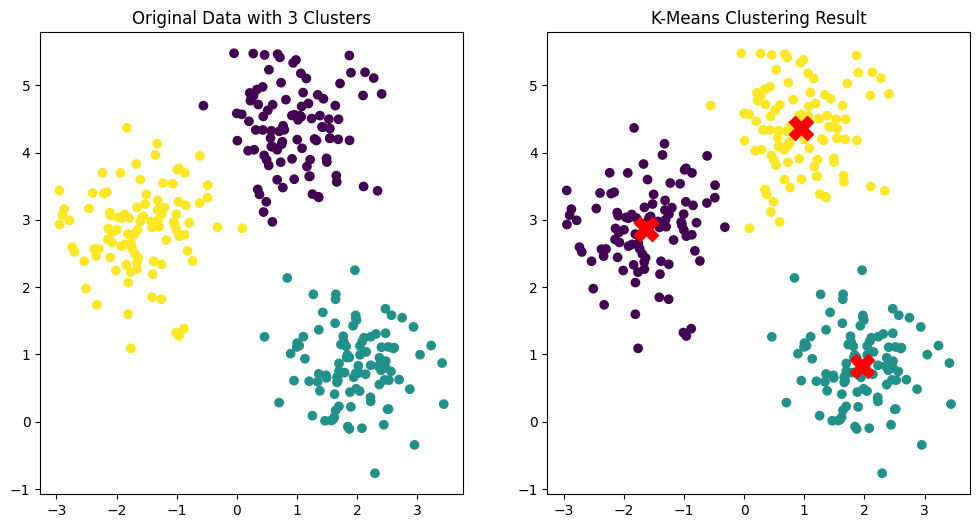

In [20]:
xyz = 1
if xyz ==1 : 
    clusters_kmeans, centroids_kmeans = kmeans(X, k=3)
else:
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(X)
    clusters_kmeans, centroids_kmeans = kmeans.labels_, kmeans.cluster_centers_
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data with 3 Clusters")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering Result")

plt.show()

In [21]:
from collections import deque

def dbscan(X, eps, min_samples):
    labels = np.full(X.shape[0], -1) 
    C = 0 
    
    def region_query(point):
        return np.where(np.linalg.norm(X - point, axis=1) <= eps)[0]
    
    def expand_cluster(point_idx, neighbors):
        nonlocal C
        labels[point_idx] = C
        queue = deque(neighbors)
        
        while queue:
            current_idx = queue.popleft()
            if labels[current_idx] == -1:  
                labels[current_idx] = C
            
            if labels[current_idx] == 0:  
                labels[current_idx] = C
                current_neighbors = region_query(X[current_idx])
                
                if len(current_neighbors) >= min_samples:
                    queue.extend(current_neighbors)
        
        C += 1
    
    for i in range(len(X)):
        if labels[i] == -1:
            neighbors = region_query(X[i])
            if len(neighbors) >= min_samples:
                expand_cluster(i, neighbors)
    
    return labels


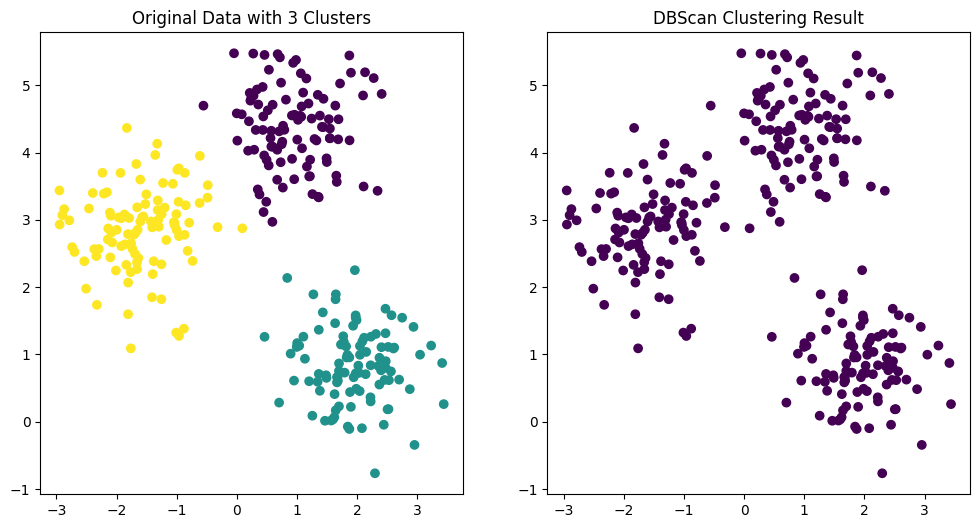

In [22]:
xyz = 2
if xyz ==1 :
    labels_dbscan = dbscan(X, eps=1, min_samples=5)
else:
    dbscan = DBSCAN(eps=1, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data with 3 Clusters")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
plt.title("DBScan Clustering Result")

plt.show()

In [27]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def calculate_distance_matrix(X):
    n = X.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distance_matrix[i, j] = euclidean_distance(X[i], X[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

def find_closest_clusters(distance_matrix):
    np.fill_diagonal(distance_matrix, np.inf)
    return np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)

def hierarchical_clustering(X):
    clusters = [[i] for i in range(len(X))]
    distances = calculate_distance_matrix(X)
    history = []
    
    while len(clusters) > 1:
        i, j = find_closest_clusters(distances)
        history.append((clusters[i], clusters[j]))
        
        # Merge clusters
        new_cluster = clusters[i] + clusters[j]
        clusters.append(new_cluster)
        
        # Remove old clusters
        del clusters[max(i, j)]
        del clusters[min(i, j)]
        
        # Update distance matrix
        distances = np.delete(distances, [i, j], axis=0)
        distances = np.delete(distances, [i, j], axis=1)
        
        new_distances = []
        for cluster in clusters[:-1]:
            dist = np.mean([euclidean_distance(X[p], X[q]) for p in new_cluster for q in cluster])
            new_distances.append(dist)
        
        new_distances = np.array(new_distances)
        distances = np.vstack((distances, new_distances))
        new_distances = np.append(new_distances, [0])  # Add zero for the diagonal
        distances = np.column_stack((distances, new_distances))
        
    return history

def plot_dendrogram(history, X):
    linkage_matrix = []
    for i, (c1, c2) in enumerate(history):
        x1 = X[c1, :].mean(axis=0)
        x2 = X[c2, :].mean(axis=0)
        dist = euclidean_distance(x1, x2)
        linkage_matrix.append([c1[0], c2[0], dist, len(c1) + len(c2)])
    
    linkage_matrix = np.array(linkage_matrix)
    dendrogram(linkage_matrix)
    plt.show()

# Generate sample data
X, _ = make_blobs(n_samples=10, centers=3, cluster_std=0.60, random_state=0)

# Perform Hierarchical Clustering
history = hierarchical_clustering(X)

# Plot the dendrogram
plot_dendrogram(history, X)

ValueError: Linkage 'Z' uses the same cluster more than once.